<h2>Code is here https://github.com/dsivakumar/covid-19-India</h2>

In [235]:
import json
import requests

import pandas as pd
from pandas.io.json import json_normalize
import datetime,time
from datetime import datetime

from math import atan2,degrees
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [236]:
#for animation
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [237]:
import random
from collections import defaultdict

In [238]:
import sys,warnings

#ignore by message
warnings.filterwarnings("ignore", )


<h3>Get Data!</h3>

In [239]:
url = "https://api.covid19india.org/states_daily.json"
data = requests.get(url)

content= pd.read_json(data.content)
df=json_normalize(data = content['states_daily'])

<h3>Check the Data </h3>

In [240]:
df.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg',
       'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')

In [241]:
#cols=['tt','mh','dl','gj', 'rj',  'mp', 'tn','up', 'tg','ap','pb', 'ka', 'kl',  'wb', 'status','date']
cols=df.columns[~df.columns.isin(['status','date'])]

In [242]:
df[cols]= df[cols].apply(pd.to_numeric)

In [243]:
top=['mh','dl','gj', 'rj',  'mp', 'tn','up', 'tg','ap', 'pb','ka', 'kl',  'wb']

In [244]:
title = ["All India",'Maharashtra', 'Delhi', 'Gujarat', 'Rajasthan','Madhya Pradesh',
         'Tamil Nadu', 'Uttar Pradesh','Telengana','Andhra Pradesh', 'Punjab', "West Bengal",'Karnataka','Kerala', "West Bengal"]

In [245]:
df.date=pd.to_datetime(df.date)

In [246]:
c_df = df.loc[df['status']=='Confirmed'].drop('status',axis=1)

In [247]:
colors = dict(zip(
    ['tt','mh','dl','gj', 'rj',  'mp', 'tn','up', 'tg','ap','pb', 'ka', 'kl',  'wb',],
    ['#adb0ff', '#adc5de', '#90d595', '#fe8a11','#aafbff', '#f7bb5f', '#eafb50',
    '#ceadde', '#f5b3ff', '#b0a1f5','#eb9e94', '#f48381','#deadbd', '#d0bb5f', '#bffb50']
))

In [248]:
titles = dict(zip(
    ['tt','mh','dl','gj', 'rj',  'mp', 'tn','up', 'tg','ap', 'pb','wb','ka', 'kl', 'jk','br','hr','or'],
    ["All India",'Maharashtra', 'Delhi', 'Gujarat', 'Rajasthan','Madhya Pradesh',
         'Tamil Nadu', 'Uttar Pradesh','Telengana','Andhra Pradesh','Punjab', "West Bengal",'Karnataka',
         'Kerala',"Jammu and Kashmir",'Bihar','Haryana','Orisa']
))

In [289]:
facecolor = '#F3F3F3'#'#fcfcf2'

In [250]:
def get_cmap(n, name='rainbow'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [251]:
cmp=get_cmap(40)

In [252]:
cmp(0)

(0.5, 0.0, 1.0, 1.0)

In [253]:
r_df = df.loc[df['status']=='Recovered'].drop('status',axis=1)
d_df = df.loc[df['status']=='Deceased'].drop('status',axis=1)

In [254]:
dts=df.date

In [255]:
today = datetime.today().strftime('%b-%d')

In [256]:
#top=['mh','gj','dl', 'rj', 'mp', 'up','tn', 'tg','ap', 'pb','ka', 'kl',  'wb']

In [257]:
g1000=c_df[cols].sum().sort_values(ascending=False)>1100
tops=g1000.index[g1000]

In [258]:
tops = tops[tops!='un']

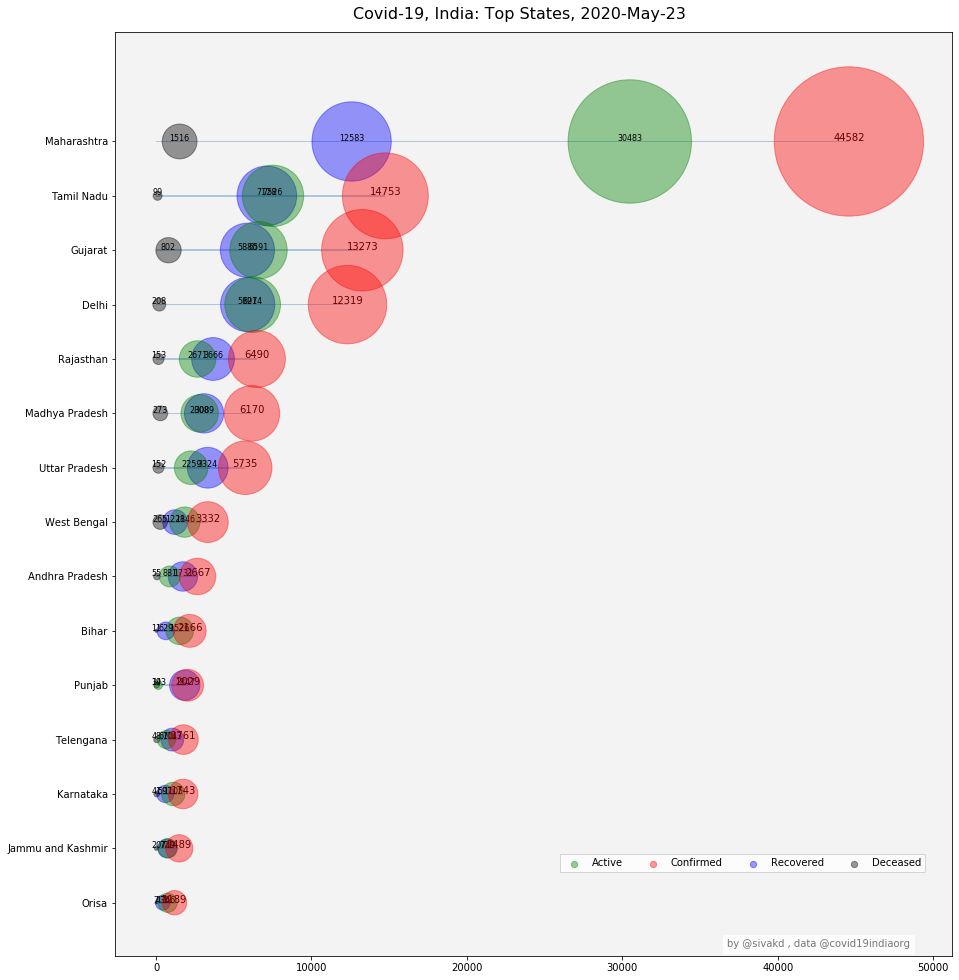

In [290]:
fig, ax = plt.subplots(figsize=(15, 17))

s=1
top = tops[1:]

cff=c_df[c_df['date']<=dts.iloc[-1]]
cff=cff[top].apply(pd.to_numeric, errors='coerce', axis=1)
cff=cff[top].sum()
cff = pd.DataFrame({'states':cff.index, 'cases':cff.values})
cff=cff.sort_values(by='cases',ascending=True)

rff=r_df[r_df['date']<=dts.iloc[-1]]
rff=rff[top].apply(pd.to_numeric, errors='coerce', axis=1)
rff=rff[top].sum()
rff = pd.DataFrame({'states':rff.index, 'cases':rff.values})
rff = rff.loc[cff.index]

dff=d_df[d_df['date']<=dts.iloc[-1]]
dff=dff[top].apply(pd.to_numeric, errors='coerce', axis=1)
dff=dff[top].sum()
dff = pd.DataFrame({'states':dff.index, 'cases':dff.values})
dff = dff.loc[cff.index]

aff = cff['cases']-rff['cases']-dff['cases']
aff = pd.DataFrame({'states':cff.states, 'cases':aff.values})
#nff = nff.sort_values(by='cases')


ax.clear()
ax.barh(cff.states,cff['cases'],height=0.03, color='#adc5de', zorder=0)
#ax.plot( cff['cases'],cff.states, 'go', zorder=1)
l1 = ax.scatter(cff['cases'],cff.states, s=cff['cases']*0.5, c="red", alpha=0.4,zorder=10)
l2 = ax.scatter(rff['cases'],rff.states, s=rff['cases']*0.5, c="blue", alpha=0.4,zorder=1)
l3 = ax.scatter(dff['cases'],dff.states, s=dff['cases']*0.8, c="black", alpha=0.4,zorder=1)

l4 = ax.scatter(aff['cases'],aff.states, s=aff['cases']*0.5, c="green", alpha=0.4,zorder=1)


for i, (value, name) in enumerate(zip(cff['cases'], cff['states'])):
    ax.text(value, i*1.001,     int(value),   size=10,        ha='center')  
for i, (value, name) in enumerate(zip(rff['cases'], rff['states'])):
    ax.text(value, i*1.0011,     int(value),   size=8,        ha='center') 

for i, (value, name) in enumerate(zip(dff['cases'], dff['states'])):
    ax.text(value, i*1.001,     int(value),   size=8,        ha='center') 

for i, (value, name) in enumerate(zip(aff['cases'], aff['states'])):
    ax.text(value, i*1.001,     int(value),   size=8,        ha='center') 

#ax.set_xscale(1)
ax.set_facecolor(facecolor) 
    
   
ax.set_yticks([])
tt= [titles[t] for t in cff.states]
plt.yticks(cff.states, tt)

fig.suptitle("Covid-19, India: Top States, 2020-"+today,size=16,y=0.90)
plt.text(0.95, 0.01, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

lgnd = plt.legend(handles = [l4,l1,l2,l3] , labels=['Active','Confirmed','Recovered', 'Deceased'],loc='center', 
             bbox_to_anchor=(0.75, 0.10),fancybox=False, shadow=False, ncol=4)

lgnd.legendHandles[0]._sizes=[40]
lgnd.legendHandles[1]._sizes=[40]
lgnd.legendHandles[2]._sizes=[40]
lgnd.legendHandles[3]._sizes=[40]


plt.savefig("covid-top-states-bubble-"+today+".png",bbox_inches = "tight")
plt.show()

In [260]:
cmp=get_cmap(15,'tab10')

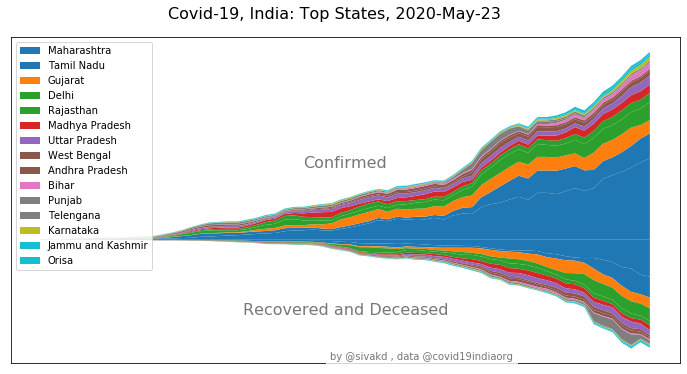

In [261]:
fig, ax = plt.subplots(figsize=(12, 6))
cff = c_df[c_df['date']<=dts.iloc[-1]]
rff = r_df[r_df['date']<=dts.iloc[-1]]
dff = d_df[d_df['date']<=dts.iloc[-1]]

w=5 #window mean
#reset top based on sum!
top=cff[tops[1:]].sum().sort_values(ascending=False).index

ax.clear()

colors = ['#adb0ff', '#7ceb9a', '#66b37a', '#fe8a11','#aafbff', '#09e2ed', '#eafb50',
    '#ceadde', '#f5b3ff', '#b0a1f5', '#f48381','#f542c5', '#d0bb5f', '#42f5e3','#4ef542']

colors=[cmp(i) for i in range(15)]

tt= [titles[t] for t in top]

cff=cff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
cf=cff[top].rolling(window=w).mean()

ax.stackplot(cf.index,cf.T,labels=tt, colors=colors)
ax.text(0.5, 0.6, 'Confirmed', transform=ax.transAxes, color='#777777', size=16, ha='center', weight=500)

rff=rff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
dff=dff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
rff= rff+dff

aff= cff-(rff+dff)

rf=-rff[top].rolling(window=w).mean()

ax.stackplot(rf.index,rf.T,colors=colors)
ax.text(0.5, 0.15, 'Recovered and Deceased', transform=ax.transAxes, color='#777777', size=16, ha='center', weight=500)
#ax.set_facecolor(facecolor) 
    
plt.legend(loc='upper left')

plt.xticks([])
plt.yticks([])

fig.suptitle("Covid-19, India: Top States, 2020-"+ today,size=16,y=0.95)
plt.text(0.75, 0.01, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))


plt.savefig("covid-top-states-stacked-"+today+".png",bbox_inches = "tight")

plt.show()

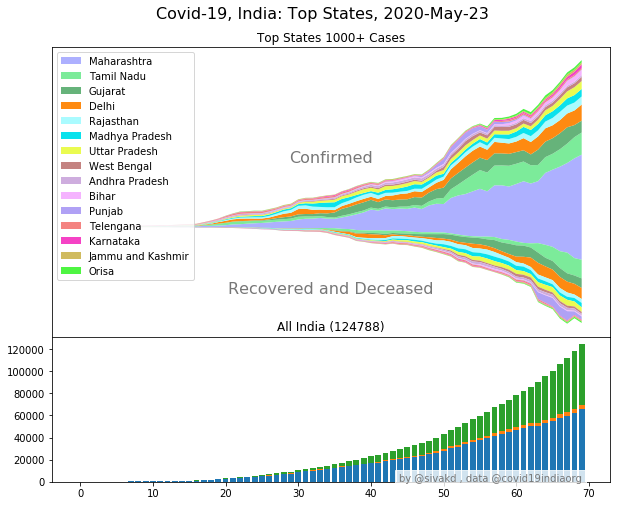

In [273]:
#top=['mh','gj','dl', 'rj',  'mp', 'tn', 'up','tg','ap','pb',  'wb', 'ka', 'kl']

fig = plt.figure(figsize=(10,8))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax = plt.subplot(gs[0])

cff = c_df[c_df['date']<=dts.iloc[-1]]
rff = r_df[r_df['date']<=dts.iloc[-1]]
dff = d_df[d_df['date']<=dts.iloc[-1]]

w=5 #window mean
#reset top based on sum!
top=cff[tops[1:]].sum().sort_values(ascending=False).index

ax.clear()

colors = ['#adb0ff', '#7ceb9a', '#66b37a', '#fe8a11','#aafbff', '#09e2ed', '#eafb50','#c48381',
    '#ceadde', '#f5b3ff', '#b0a1f5', '#f48381','#f542c5', '#d0bb5f', '#4ef542','#a34e57','#5edef7']

tt= [titles[t] for t in top]

cff=cff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
cf=cff[top].rolling(window=w).mean()

ax.stackplot(cf.index,cf.T,labels=tt, colors=colors)
ax.text(0.5, 0.6, 'Confirmed', transform=ax.transAxes, color='#777777', size=16, ha='center', weight=500)

rff=rff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
dff=dff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
rff= rff+dff

aff= cff-(rff+dff)

rf=-rff[top].rolling(window=w).mean()

ax.stackplot(rf.index,rf.T,colors=colors)
ax.text(0.5, 0.15, 'Recovered and Deceased', transform=ax.transAxes, color='#777777', size=16, ha='center', weight=500)
#ax.set_facecolor(face

plt.legend(loc='upper left')

#ax.set_xticks([])
ax.set_yticks([])

######### bottom plot #####################


#top=['tt','mh','gj','dl', 'rj',  'mp', 'tn', 'up','tg','ap','pb',  'wb', 'ka', 'kl']
top = tops

cff = c_df[c_df['date']<=dts.iloc[-1]]
rff = r_df[r_df['date']<=dts.iloc[-1]]
dff = d_df[d_df['date']<=dts.iloc[-1]]
cff=cff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
rff=rff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
dff=dff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
rff= rff+dff

aff= cff-(rff+dff)
aff=aff.drop('index',axis=1).cumsum()
rff=rff.drop('index',axis=1).cumsum()
dff=dff.drop('index',axis=1).cumsum()

ax1 = plt.subplot(gs[1], sharex = ax)

i=0
l1 = ax1.bar(aff.index, aff[top[i]] )
l2 = ax1.bar(dff.index,dff[top[i]],bottom=aff[top[i]])
l3 = ax1.bar(rff.index,rff[top[i]],bottom=aff[top[i]]+dff[top[i]])
sum = np.str(cff.sum()[top[i]].astype('int'))



ax.title.set_text('Top States 1000+ Cases')
#sum = c_df[c_df['date']<=dts.iloc[-1]]['tt'].astype('int').sum()
ax1.title.set_text(titles['tt']+ ' (' + np.str(sum) + ')')

plt.subplots_adjust(hspace=.0)

fig.suptitle("Covid-19, India: Top States, 2020-"+today,size=16,y=0.95)
fig.text(0.95, -0.5, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.savefig("covid-top-states-stacked-"+today+".png",bbox_inches = "tight")

plt.show()

In [263]:
top=tops
cff = c_df[c_df['date']<=dts.iloc[-1]]
rff = r_df[r_df['date']<=dts.iloc[-1]]
dff = d_df[d_df['date']<=dts.iloc[-1]]
cff=cff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
rff=rff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
dff=dff[top].apply(pd.to_numeric, errors='coerce', axis=1).reset_index()
rff= rff+dff

top=cff[top].sum().sort_values(ascending=False).index

aff= cff-(rff+dff)
aff=aff.drop('index',axis=1).cumsum()
rff=rff.drop('index',axis=1).cumsum()
dff=dff.drop('index',axis=1).cumsum()

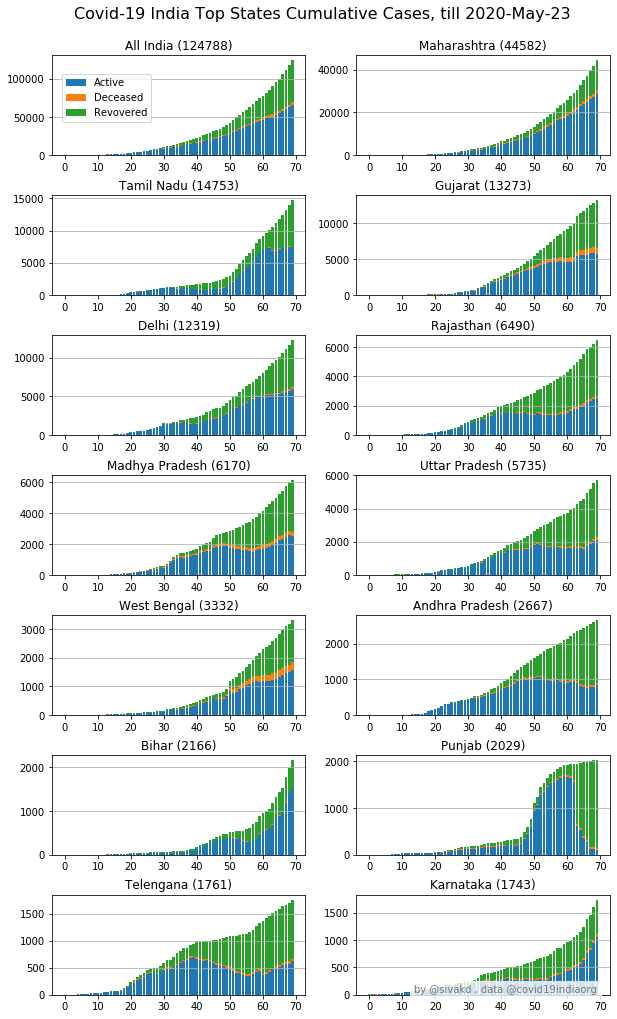

In [264]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,15),  
                                             sharex=False, sharey=False)
i=0
w=7

for ax in axes.flatten():
    l1 = ax.bar(aff.index, aff[top[i]])#,color='#b6e0b8' )
    l2 = ax.bar(dff.index,dff[top[i]],bottom=aff[top[i]])#,color='red')
    l3 = ax.bar(rff.index,rff[top[i]],bottom=aff[top[i]]+dff[top[i]])#,color='#22b518')
    sum = np.str(cff.sum()[top[i]].astype('int'))
    ax.title.set_text(titles[top[i]]+ ' (' + sum + ')')
    ax.grid(axis='y')
    i = i+1



fig.legend((l1[0],l2[0],l3[0]), ('Active','Deceased','Revovered'),loc=(0.1,0.88))
plt.text(0.95, 0.02, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
        color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
plt.subplots_adjust(left=None, bottom=0.01, right=None, top=None, wspace=None, hspace=0.4)
fig.suptitle("Covid-19 India Top States Cumulative Cases, till 2020-"+today,size=16,y=0.925)
plt.savefig("covid-top-states-stacked-active-"+today+".png",bbox_inches = "tight")

In [265]:
top

Index(['tt', 'mh', 'tn', 'gj', 'dl', 'rj', 'mp', 'up', 'wb', 'ap', 'br', 'pb',
       'tg', 'ka', 'jk', 'or'],
      dtype='object')

In [266]:
cusu = cff['tt'].cumsum()

In [267]:
cusu[cusu>49999].index[0]

53

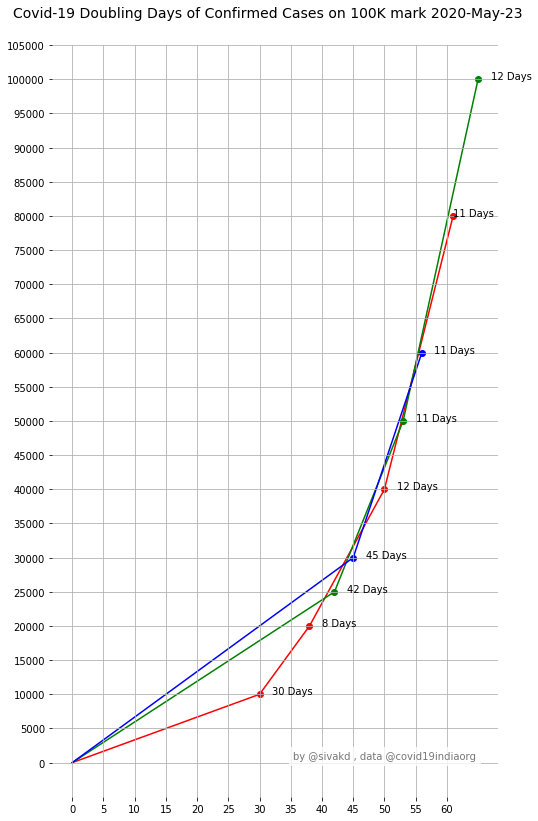

In [268]:
fig, ax = plt.subplots(figsize=(8, 12))
d=-2
cusu = cff['tt'].cumsum()
y2=9999
y1=0
x1=cusu[cusu>y1].index[0]
x2=cusu[cusu>y2].index[0]
ax.plot((x1,x2),(y1,y2), color='r', zorder=1)
ax.plot(x2,y2, 'ro',color='r', zorder=1)
ax.text(x2-d,y2,np.str(x2-x1)+' Days')

y2=20000
y1=10000
x1=cusu[cusu>y1].index[0]
x2=cusu[cusu>y2].index[0]
ax.plot((x1,x2),(y1,y2), color='r', zorder=1)
ax.plot(x2,y2, 'ro',color='r', zorder=1)
ax.text(x2-d,y2,np.str(x2-x1)+' Days')

y2=40000
y1=20000
x1=cusu[cusu>y1].index[0]
x2=cusu[cusu>y2].index[0]
ax.plot((x1,x2),(y1,y2), color='r', zorder=1)
ax.plot(x2,y2, 'ro',color='r', zorder=1)
ax.text(x2-d,y2,np.str(x2-x1)+' Days')

y2=80000
y1=40000
x1=cusu[cusu>y1].index[0]
x2=cusu[cusu>y2].index[0]
ax.plot((x1,x2),(y1,y2), color='r', zorder=1)
ax.plot(x2,y2, 'ro',color='r', zorder=1)
ax.text(x2,y2,np.str(x2-x1)+' Days')
##################################
y2=25000
y1=0
x1=cusu[cusu>y1].index[0]
x2=cusu[cusu>y2].index[0]
ax.plot((x1,x2),(y1,y2), color='g', zorder=1)
ax.plot(x2,y2, 'ro',color='g', zorder=1)
ax.text(x2-d,y2,np.str(x2-x1)+' Days')

y2=50000
y1=25000
x1=cusu[cusu>y1].index[0]
x2=cusu[cusu>y2].index[0]
ax.plot((x1,x2),(y1,y2), color='g', zorder=1)
ax.plot(x2,y2, 'ro',color='g', zorder=1)
ax.text(x2-d,y2,np.str(x2-x1)+' Days')

y2=100000
y1=50000
x1=cusu[cusu>y1].index[0]
x2=cusu[cusu>y2].index[0]
ax.plot((x1,x2),(y1,y2), color='g', zorder=1)
ax.plot(x2,y2, 'ro',color='g', zorder=1)
ax.text(x2-d,y2,np.str(x2-x1)+' Days')

##################################
y2=30000
y1=0
x1=cusu[cusu>y1].index[0]
x2=cusu[cusu>y2].index[0]
ax.plot((x1,x2),(y1,y2), color='b', zorder=1)
ax.plot(x2,y2, 'ro',color='b', zorder=1)
ax.text(x2-d,y2,np.str(x2-x1)+' Days')

y2=60000
y1=30000
x1=cusu[cusu>y1].index[0]
x2=cusu[cusu>y2].index[0]
ax.plot((x1,x2),(y1,y2), color='b', zorder=1)
ax.plot(x2,y2, 'ro',color='b', zorder=1)
ax.text(x2-d,y2,np.str(x2-x1)+' Days')


ax.set_frame_on(False)
ax.grid(axis='y')
ax.grid(axis='x')
plt.yticks(np.arange(0, 110000, 5000))
plt.xticks(np.arange(0, 65, 5))

plt.text(0.95, 0.05, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
        color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
plt.subplots_adjust(left=None, bottom=0.01, right=None, top=None, wspace=None, hspace=0.4)
fig.suptitle("Covid-19 Doubling Days of Confirmed Cases on 100K mark 2020-"+today,size=14,y=0.925)
plt.savefig("covid-doubling-days-"+today+".png",bbox_inches = "tight")

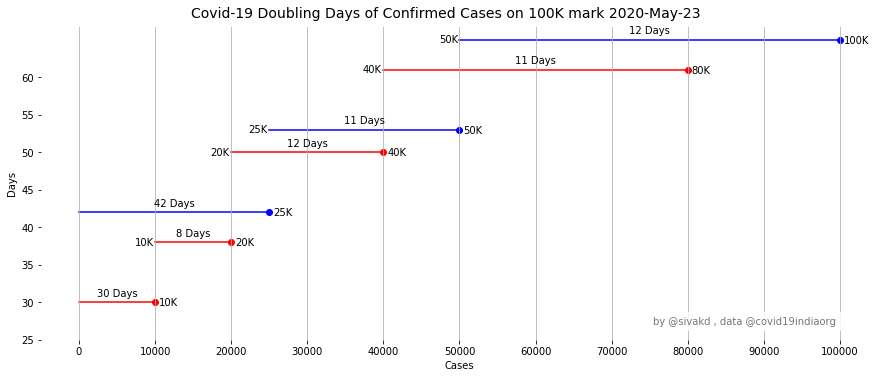

In [269]:
fig, ax = plt.subplots(figsize=(15, 5))
d=2700
dx=500
cusu = cff['tt'].cumsum()
x2=9999
x1=0
y1=cusu[cusu>x1].index[0]
y2=cusu[cusu>x2].index[0]
ax.plot((x1,x2),(y2,y2), color='r', zorder=1)
ax.plot(x2,y2, 'ro',color='r', zorder=1)
ax.text((x1+x2)/2,y2+0.81,np.str(y2-y1)+' Days',ha='center')
ax.text(x2+500,y2-0.5,'10K')

x2=20000
x1=10000
y1=cusu[cusu>x1].index[0]
y2=cusu[cusu>x2].index[0]
ax.plot((x1,x2),(y2,y2), color='r', zorder=1)
ax.plot(x2,y2, 'ro',color='r', zorder=1)
ax.text((x1+x2)/2,y2+0.81,np.str(y2-y1)+' Days',ha='center')
ax.text(x1-d,y2-0.4,'10K')
ax.text(x2+500,y2-0.4,'20K')

x1=20000
x2=40000
y1=cusu[cusu>x1].index[0]
y2=cusu[cusu>x2].index[0]
ax.plot((x1,x2),(y2,y2), color='r', zorder=1)
ax.plot(x2,y2, 'ro',color='r', zorder=1)
ax.text((x1+x2)/2,y2+0.81,np.str(y2-y1)+' Days',ha='center')
ax.text(x1-d,y2-0.4,'20K')
ax.text(x2+500,y2-0.5,'40K')

x1=40000
x2=80000
y1=cusu[cusu>x1].index[0]
y2=cusu[cusu>x2].index[0]
ax.plot((x1,x2),(y2,y2), color='r', zorder=1)
ax.plot(x2,y2, 'ro',color='r', zorder=1)
ax.text((x1+x2)/2,y2+0.81,np.str(y2-y1)+' Days',ha='center')
ax.text(x1-d,y2-0.4,'40K')
ax.text(x2+500,y2-0.5,'80K')


x1=0
x2=25000
y1=cusu[cusu>x1].index[0]
y2=cusu[cusu>x2].index[0]
ax.plot((x1,x2),(y2,y2), color='b', zorder=1)
ax.plot(x2,y2, 'ro',color='b', zorder=1)
ax.text((x1+x2)/2,y2+0.81,np.str(y2-y1)+' Days',ha='center')
ax.text(x2+500,y2-0.5,'25K')

x1=25000
x2=50000
y1=cusu[cusu>x1].index[0]
y2=cusu[cusu>x2].index[0]
ax.plot((x1,x2),(y2,y2), color='b', zorder=1)
ax.plot(x2,y2, 'ro',color='b', zorder=1)
ax.text((x1+x2)/2,y2+0.81,np.str(y2-y1)+' Days',ha='center')
ax.text(x1-d,y2-0.4,'25K')
ax.text(x2+500,y2-0.5,'50K')

x1=50000
x2=100000
y1=cusu[cusu>x1].index[0]
y2=cusu[cusu>x2].index[0]
ax.plot((x1,x2),(y2,y2), color='b', zorder=1)
ax.plot(x2,y2, 'ro',color='b', zorder=1)
ax.text((x1+x2)/2,y2+0.8,np.str(y2-y1)+' Days',ha='center')
ax.text(x1-d,y2-0.4,'50K')
ax.text(x2+500,y2-0.5,'100K')

ax.set_frame_on(False)
#ax.grid(axis='y')
ax.grid(axis='x')

plt.ylabel('Days')
plt.xlabel('Cases')
plt.xticks(np.arange(0, 110000, 10000))
plt.yticks(np.arange(25, 65, 5))
plt.text(0.95, 0.05, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
        color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
plt.subplots_adjust(left=None, bottom=0.01, right=None, top=None, wspace=None, hspace=0.4)
fig.suptitle("Covid-19 Doubling Days of Confirmed Cases on 100K mark 2020-"+today,size=14,y=0.935)
plt.savefig("covid-doubling-days-hor"+today+".png",bbox_inches = "tight")

In [270]:
rff['tt']

0        11.0
1        15.0
2        16.0
3        18.0
4        18.0
       ...   
65    42431.0
66    45609.0
67    48842.0
68    52121.0
69    55534.0
Name: tt, Length: 70, dtype: float64

In [271]:
df[df['status']=='Confirmed'][['mh','date']]

,mh,date
0,14,2020-03-14
3,18,2020-03-15
6,6,2020-03-16
9,3,2020-03-17
12,3,2020-03-18
...,...,...
195,2005,2020-05-18
198,2078,2020-05-19
201,2161,2020-05-20
204,2345,2020-05-21
